In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

In [2]:
tickers = ['MSFT']

prices = yf.download(tickers,start='2020-01-01', end='2025-01-01')['Close']

returns = prices.pct_change().dropna()
returns.head()

C:\Users\samue\AppData\Local\Temp\ipykernel_19868\2219046847.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers,start='2020-01-01', end='2025-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,MSFT
Date,
2020-01-03,-0.012452
2020-01-06,0.002584
2020-01-07,-0.009118
2020-01-08,0.015928
2020-01-09,0.012493


In [3]:
# Rendimiento promedio diario
mu = returns.mean()
mu * 100

Ticker
MSFT    0.098782
dtype: float64

In [4]:
# Rendimiento anual promedio
((1 + mu)**252 - 1) * 100

Ticker
MSFT    28.249575
dtype: float64

In [5]:
# Volatilidad diaria
vol = returns.std()
vol * 100

Ticker
MSFT    1.921145
dtype: float64

In [6]:
# Volatilidad anual
vol * np.sqrt(252) * 100

Ticker
MSFT    30.497226
dtype: float64

In [7]:
def get_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end, progress=False)['Close']
    returns = data.pct_change().dropna()
    mu = returns.mean()
    sigma = returns.std()
    return data, mu, sigma

In [8]:
data, mu, sigma = get_data('MSFT', '2020-01-01', '2025-01-01')
mu * 100, sigma * 100

C:\Users\samue\AppData\Local\Temp\ipykernel_19868\281825744.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, progress=False)['Close']


(Ticker
 MSFT    0.098782
 dtype: float64,
 Ticker
 MSFT    1.921145
 dtype: float64)

In [9]:
# Obtener rendimientos y precios simulados
Z = np.random.normal(0, 1, 1000)
simulated_returns = np.array(mu) + np.array(sigma) * Z

# Rendimientos del activo modelados como mu + sigma * Z
# Z es una normal estándar

In [15]:
cumulative_returns = (1 + simulated_returns).cumprod()

In [17]:
cumulative_returns[-1] / cumulative_returns[0] - 1

np.float64(-0.6220165614154759)

In [11]:
initial_price = np.array(prices.iloc[-1])
initial_price

array([419.19656372])

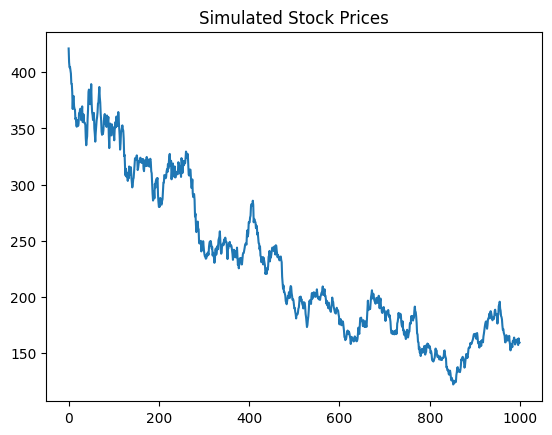

In [12]:
simulated_prices = initial_price * cumulative_returns

plt.plot(simulated_prices)
plt.title('Simulated Stock Prices')
plt.show()

---
## Función para simular precios futuros

Pasamos todo lo anterior visto a una función que recibe como parámetros la media, volatilidad, precios históricos y número de días a simular.

In [27]:
# Función para descargar datos de yfinance y calcular mu y sigma
def get_data(ticker, start, end):
    prices = yf.download(ticker, start=start, end=end, progress=False)['Close']
    returns = prices.pct_change().dropna()
    mu = returns.mean()
    sigma = returns.std()
    return prices, mu, sigma

In [ ]:
# Función para simular precios futuros
def simular_precios(mu, sigma, prices, num_dias):
    Z = np.random.normal(0, 1, num_dias)
    simulated_returns = np.array(mu) + np.array(sigma) * Z
    cumulative_returns = (1 + simulated_returns).cumprod()
    initial_price = np.array(prices.iloc[-1])
    simulated_prices = initial_price * cumulative_returns
    return simulated_prices

C:\Users\samue\AppData\Local\Temp\ipykernel_19868\2386553773.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(ticker, start=start, end=end, progress=False)['Close']


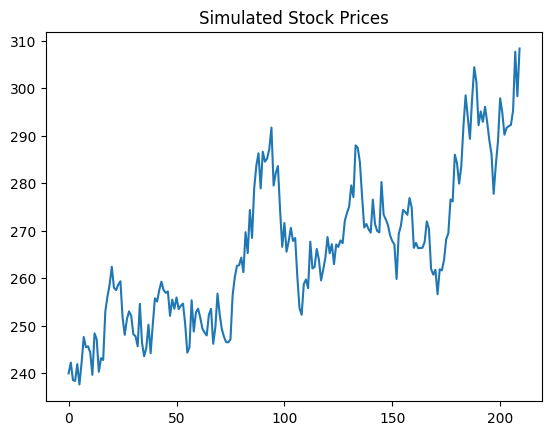

In [ ]:
prices, mu, sigma = get_data('AAPL', dt.datetime.now() - dt.timedelta(days=365 * 4), dt.datetime.now())

precios_simulados = simular_precios(mu, sigma, prices, 210)

plt.plot(precios_simulados)
plt.title('Simulated Stock Prices')
plt.show()

C:\Users\samue\AppData\Local\Temp\ipykernel_19868\2386553773.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(ticker, start=start, end=end, progress=False)['Close']


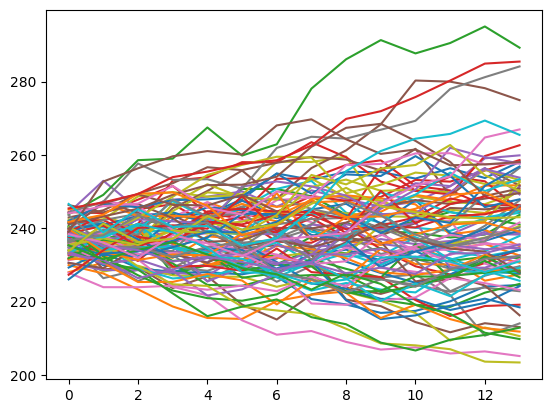

In [ ]:
num_simulaciones = 100
num_dias = 14

trayectorias_de_precios = np.zeros((num_simulaciones, num_dias))

prices, mu, sigma = get_data('AAPL', dt.datetime.now() - dt.timedelta(days=365 * 4), dt.datetime.now())

for i in range(num_simulaciones):

    precios_simulados = simular_precios(mu, sigma, prices, num_dias)
    trayectorias_de_precios[i,:] = precios_simulados

plt.plot(trayectorias_de_precios.T)

---

## Portafolio